## Chapter 4 - Clustering

#### Iris datasets

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

X = data.data
y = data.target
#data.DESCR
#data.data
#data.target_names
#data.target

In [ ]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y==2,2],X[y==2,3],"g^",label="Iris virfinica")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Gaussian

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
y_pred = GaussianMixture(n_components=3,random_state=42).fit(X).predict(X)
y_pred

In [ ]:
from scipy import stats
import numpy as np

mapping = {}
for class_id in np.unique(y):
    mode,_ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id 
mapping

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

In [ ]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.plot(X[y_pred==0,2],X[y_pred==0,3],"yo",label="Cluster 1")
plt.plot(X[y_pred==1,2],X[y_pred==1,3],"bs",label="Cluster 2")
plt.plot(X[y_pred==2,2],X[y_pred==2,3],"g^",label="Cluster 3")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y==2,2],X[y==2,3],"g^",label="Iris virfinica")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [ ]:
#accuuracy
np.sum(y_pred == y)
np.sum(y_pred==y)/len(y_pred)

## K-Means

In [ ]:
#create dataset
from sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [[0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [ ]:
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,random_state=7)
print(X)
print(y)

In [94]:
def plot_cluster(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("X_1",fontsize=14)
    plt.ylabel("X_2",fontsize=14)
    plt.figure(figsize=(8,4))
    plt.show()


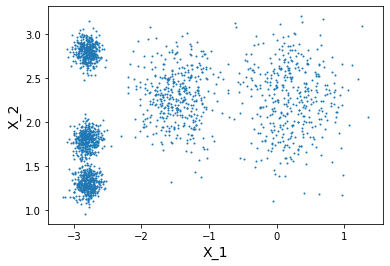

<Figure size 576x288 with 0 Axes>

In [95]:
plot_cluster(X)

In [97]:
from sklearn.cluster import KMeans

In [99]:
k = 5 
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [100]:
kmeans.cluster_centers_
'''
#blob_centers = np.array(
    [[0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]]
)
'''

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])